In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.cm as cm


train = pd.read_csv("MNIST/train.csv")
test = pd.read_csv("MNIST/test.csv")



In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


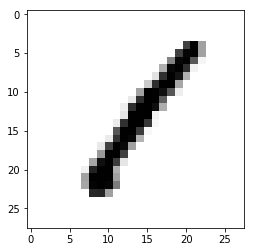

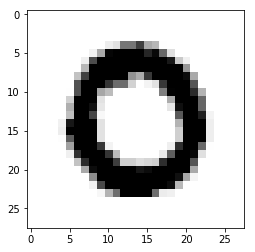

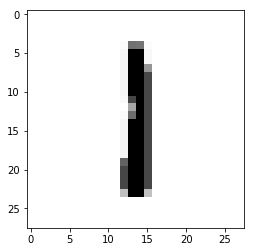

In [5]:
train_data = train.values
train_x = train_data[:,1:]
 # one hot encoding
one_hot = np.zeros([train_data.shape[0], 10])
one_hot[np.arange(train_data.shape[0]),train_data[:,0]] = 1
train_y = one_hot 

for i in range(3):
    plot.imshow((train_x[i,:]).reshape((28,28)),cmap=cm.binary)
    plot.show()

In [6]:
tf.reset_default_graph()

input_layer_nodes = 784
hidden_layer1_nodes = 256
hidden_layer2_nodes = 256
output_layer_nodes = 10

X = tf.placeholder(tf.float32, [None, input_layer_nodes])
Y = tf.placeholder(tf.float32, [None, output_layer_nodes])

W1 = tf.Variable(tf.random_normal([input_layer_nodes, hidden_layer1_nodes]))
W2 = tf.Variable(tf.random_normal([hidden_layer1_nodes, hidden_layer2_nodes]))
W3 = tf.Variable(tf.random_normal([hidden_layer2_nodes, output_layer_nodes]))

b1 = tf.Variable(tf.random_normal([hidden_layer1_nodes]))
b2 = tf.Variable(tf.random_normal([hidden_layer2_nodes]))
b3 = tf.Variable(tf.random_normal([output_layer_nodes]))

out_hidden1 = tf.nn.relu(tf.add(tf.matmul(X, W1),b1))
out_hidden2 = tf.nn.relu(tf.add(tf.matmul(out_hidden1, W2),b2))
out_output = tf.add(tf.matmul(out_hidden2, W3),b3)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=out_output))

accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.arg_max(out_output, 1), tf.arg_max(Y,1)), tf.float32))

train = tf.train.AdamOptimizer(learning_rate=0.01).minimize(loss)

In [ ]:
batch_size = 2000
test_size = 300
train_data_len = len(train_data)
train_step = 1000
log_step = 30

loss_stack = []
acc_stack = []


sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(train_step): 
    # get random batch
    rand_idx = np.random.choice(train_data_len, size=batch_size)
    rand_tet_idx = np.random.choice(train_data_len, size=test_size)
    feed = {X:train_x[rand_idx,:], Y: train_y[rand_idx,:]}
    test_feed = {X:train_x[rand_tet_idx, :], Y: train_y[rand_tet_idx, :]}
    sess.run(train, feed)
    
    loss_stack.append(sess.run(loss,feed))
    acc_stack.append(sess.run(accuracy,feed))
    
    
    if(step % log_step == 0):
        print("step: ", step,"  loss: ", sess.run(loss,feed), "  train_acc: ", sess.run(accuracy,feed), "    test_acc: ", sess.run(accuracy, test_feed))

step:  0   loss:  216758.0   train_acc:  0.131     test_acc:  0.133333
step:  30   loss:  12588.8   train_acc:  0.8855     test_acc:  0.883333
step:  60   loss:  7619.98   train_acc:  0.908     test_acc:  0.936667
step:  90   loss:  4206.97   train_acc:  0.934     test_acc:  0.91
step:  120   loss:  2520.05   train_acc:  0.95     test_acc:  0.956667
step:  150   loss:  2043.55   train_acc:  0.957     test_acc:  0.953333
step:  180   loss:  1206.63   train_acc:  0.965     test_acc:  0.983333
step:  210   loss:  1472.96   train_acc:  0.9705     test_acc:  0.97
step:  240   loss:  1152.11   train_acc:  0.9695     test_acc:  0.99
step:  270   loss:  521.442   train_acc:  0.9825     test_acc:  0.966667
step:  300   loss:  655.064   train_acc:  0.9785     test_acc:  0.986667
step:  330   loss:  351.337   train_acc:  0.986     test_acc:  0.986667
step:  360   loss:  310.697   train_acc:  0.9855     test_acc:  0.983333
step:  390   loss:  117.719   train_acc:  0.9935     test_acc:  0.99
step: 

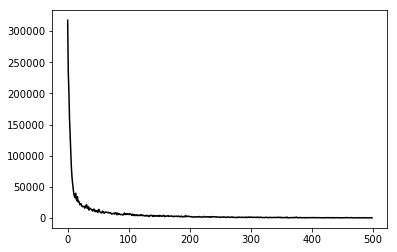

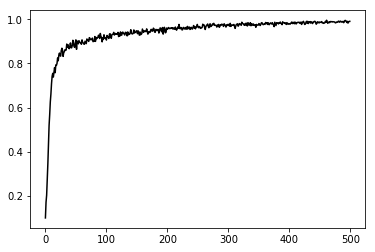

In [8]:
plot.plot(loss_stack, 'k-')
plot.show()
plot.plot(acc_stack, 'k-')
plot.show()

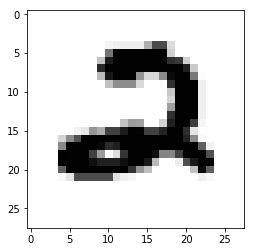

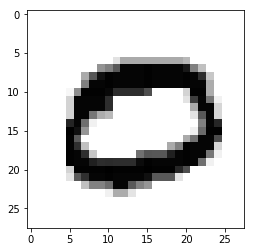

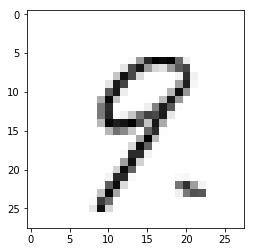

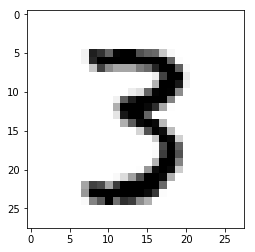

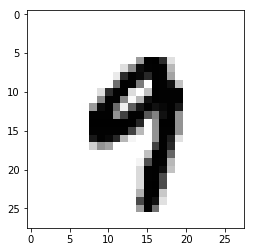

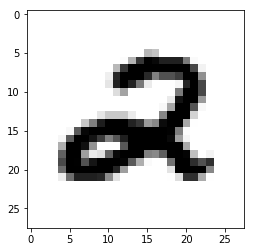

In [19]:
for i in range(3):
    plot.imshow((test.values[i,:]).reshape((28,28)),cmap=cm.binary)
    plot.show()
for i in range(3):
    plot.imshow((test.values[27997+i, :]).reshape((28,28)), cmap=cm.binary)
    plot.show()

In [37]:
#

imgID = np.arange(1, 28001).reshape((-1,1))
prediction = np.argmax(sess.run(out_output,{X:test.values}), 1).astype(int).reshape((-1,1))
print(prediction)
with open('final.csv', 'wb') as f:
  f.write(b'ImageId,Label\n')
  np.savetxt(f, np.concatenate((imgID, prediction),axis=1), fmt= '%i',delimiter=",")

[[2]
 [0]
 [9]
 ..., 
 [3]
 [9]
 [2]]
